# Kaggle Competition  - Can you differentiate a weed from a crop seedling?
The ability to do so effectively can mean better crop yields and better stewardship of the environment. The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of approximately 960 unique plants (4750 images in total) belonging to 12 species at several growth stages.

In [28]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import cv2
%matplotlib inline
from glob import glob
import seaborn as sns
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
enc = OneHotEncoder(handle_unknown='ignore')
test_base_dir = '../../data/test/'

# Opening a few random images
The image are squared but with different pixel width.

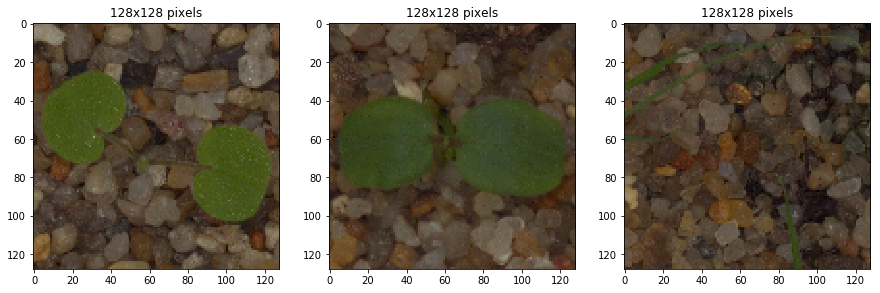

In [40]:
sampled_data_paths = ['{}0021e90e4.png'.format(test_base_dir), '{}33748968f.png'.format(test_base_dir), '{}65e97117e.png'.format(test_base_dir)] 

plt.figure(figsize=(15,10))
for i, (path, crop_name) in enumerate(zip(sampled_data_paths, ['SugarBeet', 'Cleavers', 'BlackGrass'])):
    img = cv2.imread(path)
    RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1,len(sampled_data_paths), i+1)
    plt.imshow(RGB_im)
    plt.title('{}x{} pixels'.format(RGB_im.shape[0], RGB_im.shape[1]))

In [37]:
paths = [path for path in glob(test_base_dir+'/*')]

# Image Resizing

Images gathered from Internet will be of varying sizes. Due to presence of fully connected layers in most of the neural networks, the images being fed to network will be required of a fixed size (unless you are using Spatial Pyramid Pooling before passing to dense layers). Because of this, before the image augmentation happens, let us preprocess the images to the size which our network needs. With the fixed sized image, we get the benefits of processing them in batches.

In [39]:
import tensorflow as tf
import matplotlib.image as mpimg
import numpy as np
from tqdm import tqdm

IMAGE_SIZE = 128

def tf_resize_images(X_img_file_paths):
    X_data = []
    tf.reset_default_graph()
    X = tf.placeholder(tf.float32, (None, None, 3))
    tf_img = tf.image.resize_images(X, (IMAGE_SIZE, IMAGE_SIZE), 
                                    tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        # Each image is resized individually as different image may be of different size.
        for index, file_path in tqdm(enumerate(X_img_file_paths), total=len(X_img_file_paths)):
            img = mpimg.imread(file_path)[:, :, :3] # Do not read alpha channel.
            resized_img = sess.run(tf_img, feed_dict = {X: img})
            mpimg.imsave(file_path, resized_img)
tf_resize_images(paths)

100%|██████████| 794/794 [00:12<00:00, 62.86it/s]
